In [15]:
import json  
import zipfile
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
d = None  
data = None  
with zipfile.ZipFile("/home/wenbenc/two-sigma-connect-rental-listing-inquiries/train.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data = f.read()
            d = json.loads(data.decode("utf-8"))

train.json


In [17]:
# Constructing DataFrame my_df from a dictionary d
my_df = pd.DataFrame(d)

In [18]:
# look at the first five attributes of data
my_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [118]:
# Seperate the data into training and testing sets
from sklearn.model_selection import train_test_split
# use number 0, 1, and 2 to determine 'low', 'medium' and 'high' of 'interest_level'
my_df['interest'] = my_df['interest_level'].apply(lambda t: 0 if t == 'low' else 1 if t == 'medium' else 2)

In [119]:
# Select 'bathrooms', bedrooms', 'lattice', 'longitude' and 'price' as features
x = my_df[['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price'] ]
# Select 'interest_level' as interest
y = my_df['interest']

In [120]:
# Select 20 percent attributes for testing and the rest 80 percent attributes for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [121]:
from sklearn.tree import DecisionTreeClassifier
# Classification use DecisionTreeClassifier from the tree library of sklearn
classifier = DecisionTreeClassifier()
# Train the decision tree 
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# Make prediction of testing data
prediction = classifier.predict(x_test)

In [22]:
# Report the accuracy of decision tree
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      6843
           1       0.37      0.32      0.35      2228
           2       0.34      0.26      0.30       800

    accuracy                           0.67      9871
   macro avg       0.50      0.47      0.48      9871
weighted avg       0.65      0.67      0.66      9871



In [60]:
# Construct the decision tree using the Iris dataset
from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)
classifier = tree.DecisionTreeClassifier()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

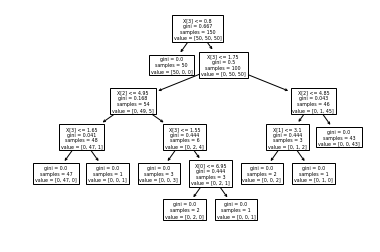

In [61]:
tree.plot_tree(classifier.fit(x,y)) 

In [114]:
# modification: Use AdaBoost 
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

x, y = load_iris(return_X_y=True)
classifier = AdaBoostClassifier(n_estimators=100)

In [100]:
#modification: use Bagging (Bootstrap Aggregation) 
from sklearn.ensemble import BaggingClassifier
classifer = BaggingClassifier(classifier, n_estimators = 100, max_samples = 0.8, random_state=1)
classifer.fit(x, y)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [110]:
# modification: Use Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier= classifier.fit(x, y)

In [115]:
from sklearn.tree import DecisionTreeClassifier
# Train the decision tree 
classifier.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [116]:
# Make prediction of testing data
prediction = classifier.predict(x_test)

In [117]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      6843
           1       0.38      0.06      0.11      2228
           2       0.48      0.15      0.23       800

    accuracy                           0.70      9871
   macro avg       0.53      0.40      0.39      9871
weighted avg       0.63      0.70      0.62      9871

